In [ ]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

## Importing a transformers pretrained model

In [ ]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

In [ ]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)
eos_token_id = tokenizer.eos_token_id

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
ids = tokenizer.encode('This is an example of text, and')
ids

[1212, 318, 281, 1672, 286, 2420, 11, 290]

In [ ]:
tokenizer.decode(ids)

'This is an example of text, and'

In [ ]:
!pip install gradio
!pip install accelerate
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.3 MB/s e

In [ ]:
import torch
import accelerate
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import gdown

In [ ]:
t = torch.LongTensor(ids)[None] # Перетворення ids в тензор
preds = model.generate(t)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
preds.shape,preds[0]

(torch.Size([1, 20]),
 tensor([1212,  318,  281, 1672,  286, 2420,   11,  290,  340,  338,  407,  257,
          922,  530,   13,  198,  198,  464,  717, 1517]))

In [ ]:
tokenizer.decode(preds[0].numpy())

"This is an example of text, and it's not a good one.\n\nThe first thing"

In [ ]:
from fastai.text.all import *

### Preparing the data

In [ ]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('/root/.fastai/data/wikitext-2/train.csv'),Path('/root/.fastai/data/wikitext-2/test.csv')]

In [ ]:
def remove_emojis(text):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)
  text_without_emoji = emoji_pattern.sub(r'', text)
  cleaned_text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F004\U0001F0CF\U0001F170-\U0001F251\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U0001F191-\U0001F251\U0001F300-\U0001F5FF\U0001F30D-\U0001F567\U0001F004\U0001F170-\U0001F251\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+', '', text_without_emoji)
  cleaned_string = re.sub(r'\s*#\w+\s*', '', cleaned_text)
  #cleaned_text = re.sub(r'@\w+\b', '', cleaned_string )
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
  return cleaned_text


In [ ]:
url = 'https://drive.google.com/uc?id=1PCgRZ0xIPmUKm5r3bHY2VENS5rXH2vBn'
df = 'df.csv'

gdown.download(url, df, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PCgRZ0xIPmUKm5r3bHY2VENS5rXH2vBn
To: /content/df.csv
100%|██████████| 15.3M/15.3M [00:00<00:00, 50.3MB/s]


'df.csv'

In [ ]:
#path_to_dataset = '/content/dataset_instagram-scraper_2024-04-10_12-24-38-967.csv'
df = pd.read_csv('/content/df.csv')
df = df['caption']
new_data = df.dropna()



<ipython-input-15-1e638334befc>:2: DtypeWarning: Columns (53,55,56,57,58,60,61,62,63,65,66,67,68,70,71,72,73,75,76,77,78,80,81,82,83,85,86,87,92,115,117,118,119,120,122,123,124,125,127,128,129,130,132,133,134,135,137,138,139,140,142,143,144,145,147,148,149,150,152,153,154,159,177,179,180,181,182,184,185,186,187,189,190,191,192,194,195,196,216,218,219,220,221,223,224,225,240,242,243,244,245,247,248,249,264,266,267,268,269,271,272,273,277,282,287,288,290,291,292,294,295,296,301,306,307,309,310,311,313,314,315,320,325,326,328,329,330,332,333,334,339,344,345,347,348,349,351,352,354,355,356,358,359,360,362,363,364,366,367,368,402,403,404,405,406,407,415,416,417,418,420,590,591,592,593,609,610,611,612,654,655,656,657,658,659,661,663,664,745,747,748,749,750,752,753,754,755,757,758,759,760,762,763,764) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/df.csv')


In [ ]:
new_data = new_data.apply(remove_emojis)

In [ ]:
df_train_list, df_valid_list = train_test_split(new_data, test_size=0.2)
df_train = pd.DataFrame(df_train_list)
df_valid = pd.DataFrame(df_valid_list)
df_train.head()

,caption
796,"""Be thankful for what you have; you’ll end up having more. If you concentrate on what you don’t have, you will never, ever have enough."" - Oprah Winfrey | @seattlebred with #OspreyAmbassador @amberkchang | Featured pack from the Duro/Dyna Series #ospreypacks #ospreyambassador #thegooddaysaremade"
1829,"A hard frost glistens on the rocks. The air is cold but windless, and for now, the only light comes from a few stars, headlamps, and their glow on the freshly white ground. Conditions seem good, as long as sunrise warms the verglas from the rocks. We just can’t be too quick to reach the steeper sections of the ridge. When we get there, the summit of Weissmies will be my first 4000-meter climb. | Link to full post by @kimberly.strom in our bio| : @danpatitucci | #ospreypacks"
593,“I like this place and could willingly waste my time in it.” - WIlliam Shakespear | @earth.to.allie_ | Featured pack from the Daylite Series | #OspreyPacks
1037,“Unbridled joy of accomplishment”. by: @digby_coffee Featured pack from the Jet Series #ospreypacks #thegooddaysaremade
1713,“The good you did yesterday will bring you happiness when you wake.” @kellylovejoy @shagzilla @compassion_flash | Featured pack from the Farpoint/Fairview Series #OspreyPacks


In [ ]:
print(type(df_train))
print(df_train.iloc[0])
print(type(df_train.iloc[0]))

<class 'pandas.core.frame.DataFrame'>
caption    "Be thankful for what you have; you’ll end up having more. If you concentrate on what you don’t have, you will never, ever have enough." - Oprah Winfrey | @seattlebred with #OspreyAmbassador @amberkchang | Featured pack from the Duro/Dyna Series #ospreypacks #ospreyambassador #thegooddaysaremade
Name: 796, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
all_texts = np.concatenate([df_train_list, df_valid_list])

In [ ]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x):
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [ ]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [ ]:
tls.train[0],tls.valid[0]

(tensor([    1,  3856, 25535,   329,   644,   345,   423,    26,   345,   447,
           247,   297,   886,   510,  1719,   517,    13,  1002,   345, 20062,
           319,   644,   345,   836,   447,   247,    83,   423,    11,   345,
           481,  1239,    11,  1683,   423,  1576,   526,   532, 47857,  7178,
         37425,   930,  2488,   325,  1999, 36074,   351,  1303,    46,  2777,
          4364, 35649, 10623,  2488,  7789,    74,   354,   648,   930, 38188,
          2353,   422,   262,   360,  1434,    14,    35, 46434,  7171,  1303,
          2117,  4364, 32377,  1303,  2117,  4364,  4131, 10623,  1303,  1169,
         11274, 12545,   533,  9727]),
 tensor([40656,  2894,   290,  7703,  1757,  3750, 12478,    13,   930,  2488,
         26601,   324,    13,    76,   624,   930, 38188,  2353,   422,   262,
          1629, 16785,    14,    32,  5330, 13077,  7171,   930,  1303,    46,
          2777,  4364,    47,  4595]))

In [ ]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([84]), torch.Size([34]))

In [ ]:
show_at(tls.train, 0)

"Be thankful for what you have; you’ll end up having more. If you concentrate on what you don’t have, you will never, ever have enough." - Oprah Winfrey | @seattlebred with #OspreyAmbassador @amberkchang | Featured pack from the Duro/Dyna Series #ospreypacks #ospreyambassador #thegooddaysaremade


In [ ]:
show_at(tls.valid, 0)

Robinhood and Little John gone fishing. | @nomad.mick | Featured pack from the Atmos/Aura AG Series | #OspreyPacks


In [ ]:
bs,sl = 4,256
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,"Winter in the backcountry is a special thing around here in the southwest and across the U.S. It’s important to recognize the organizations dedicated to helping preserve our access, protect our environment and provide education—allowing us to continue safely enjoying this remarkable time of year, for years to come. Join us in spotlighting a few of our favorite non-profit organizations helping us make the most of our cherished winters. 1: @winterwildlandsalliance 2: @friendsofthesanjuans 3: @protectourwintersAnd just like that, POOF, an adventure appears. | @danilstrobel | Featured pack from the Atmos/Aura AG Series | #OspreyPacksElevate your backcountry experience with Osprey's Soelden | Sopris Family. Developed alongside professional guides, athletes, and devoted backcountry recreationalists, our Soelden/Sopris Family puts safety first. Shop best-in-class backcountry touring packs now. #OspreyPacksFor 2021, we’re partnering with @darntoughvermont, @lekiusa, @nemoequipment, @peakrefuel, @sawyerproducts and @","in the backcountry is a special thing around here in the southwest and across the U.S. It’s important to recognize the organizations dedicated to helping preserve our access, protect our environment and provide education—allowing us to continue safely enjoying this remarkable time of year, for years to come. Join us in spotlighting a few of our favorite non-profit organizations helping us make the most of our cherished winters. 1: @winterwildlandsalliance 2: @friendsofthesanjuans 3: @protectourwintersAnd just like that, POOF, an adventure appears. | @danilstrobel | Featured pack from the Atmos/Aura AG Series | #OspreyPacksElevate your backcountry experience with Osprey's Soelden | Sopris Family. Developed alongside professional guides, athletes, and devoted backcountry recreationalists, our Soelden/Sopris Family puts safety first. Shop best-in-class backcountry touring packs now. #OspreyPacksFor 2021, we’re partnering with @darntoughvermont, @lekiusa, @nemoequipment, @peakrefuel, @sawyerproducts and @vas"
1,"ini | #ospreypacks #thegooddaysaremade #livemusic #concertOsprey Packs welcomes @roderickaugustmusic for an intimate set from Nashville. His debut album is available now everywhere music is streaming. Thank youLive for the moments you can't put into words. | @ari.par1 | Featured pack from the Poco Series #ospreypacks""Believe you can and you're halfway there."" - Theodore Roosevelt | @travelingjackie | Featured pack from the Raptor/Raven Series #ospreypacks #ospreyambassador #thegooddaysmaremade""The natural state of motherhood is unselfishness. When you become a mother, you are no longer the center of your own universe. You relinquish that position to your children.” - Jessica Lange | For those future moms that love getting outside, #OspreyAmbassador @backpackerbhav is sharing 9 important tips she's learned while hiking and pregnant. Head to our Stories today to check them out! | @shashankvijayphotos | Featured pack from the Skarab/Skimmer Series #ospreypacks #thegooddaysaremade""Nature is painting for us, day after day, pictures of","| #ospreypacks #thegooddaysaremade #livemusic #concertOsprey Packs welcomes @roderickaugustmusic for an intimate set from Nashville. His debut album is available now everywhere music is streaming. Thank youLive for the moments you can't put into words. | @ari.par1 | Featured pack from the Poco Series #ospreypacks""Believe you can and you're halfway there."" - Theodore Roosevelt | @travelingjackie | Featured pack from the Raptor/Raven Series #ospreypacks #ospreyambassador #thegooddaysmaremade""The natural state of motherhood is unselfishness. When you become a mother, you are no longer the center of your own universe. You relinquish that position to your children.” - Jessica Lange | For those future moms that love getting outside, #OspreyAmbassador @backpackerbhav is sharing 9 important tips she's learned while hiking and pregnant. Head to our Stories today to check them 

In [ ]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [ ]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x):
        return x if isinstance(x, Tensor) else tokenize(x)

    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [ ]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,"In good company. : @awakeyouradventure @boglesbackcountry @adventuresof.dan #OspreyPacks""The first time I attended Trans Cascadia I was out of shape and under-prepared. I signed up on a whim, burnt out, in a dark place, and pretty much over mountain biking. If four days of blind racing and riding on some of the best primitive single track in the Pacific Northwest didn’t remind me of what I loved about this silly sport, nothing would.If I didn’t have fun it would be a sure sign I needed to move on."" - @vurtle_the_turtle | Check our our latest blog that highlights how mountain biking helped Mike connect with nature and forge new friendships. | : @vurtle_the_turtle | #ospreypacks #mountainbikingThanks for following along on our Arctic expedition! I'm back for the final day of my takeover. Follow @rayzahab and @stefanogregoretti to see more of this content! Here we are starting out on the third stage","good company. : @awakeyouradventure @boglesbackcountry @adventuresof.dan #OspreyPacks""The first time I attended Trans Cascadia I was out of shape and under-prepared. I signed up on a whim, burnt out, in a dark place, and pretty much over mountain biking. If four days of blind racing and riding on some of the best primitive single track in the Pacific Northwest didn’t remind me of what I loved about this silly sport, nothing would.If I didn’t have fun it would be a sure sign I needed to move on."" - @vurtle_the_turtle | Check our our latest blog that highlights how mountain biking helped Mike connect with nature and forge new friendships. | : @vurtle_the_turtle | #ospreypacks #mountainbikingThanks for following along on our Arctic expedition! I'm back for the final day of my takeover. Follow @rayzahab and @stefanogregoretti to see more of this content! Here we are starting out on the third stage"
1,"what you will be hereafter."" - William James | @dan.holz.photo | Featured pack from the Manta and Mira Series #ospreypacks“Remember what peace there may be in silence” #MaxEhrmann | : @oton.ography @steventhornbury #OspreyPacksLooking forward to the weekend like... | : @smc273 #OspreyPacks... Featured pack is an older version of our (recently updated for 2018!) Exos/Eja series""Wisdom begins in wonder."" - Socrates by: @mozoph Featured pack from the Talon/Tempest Series #ospreypacks #thegooddaysaremade""The more disconnected from our past we are, the more we want to reach back and touch it a little bit, and this is one of the ways that people can do that. These places we go to are impossible to get to unless you walk there. It’s not just hiking, it becomes your life. You get up, you walk, you eat, you walk, you go to sleep, you get up and walk. This is a devotion. You put","you will be hereafter."" - William James | @dan.holz.photo | Featured pack from the Manta and Mira Series #ospreypacks“Remember what peace there may be in silence” #MaxEhrmann | : @oton.ography @steventhornbury #OspreyPacksLooking forward to the weekend like... | : @smc273 #OspreyPacks... Featured pack is an older version of our (recently updated for 2018!) Exos/Eja series""Wisdom begins in wonder."" - Socrates by: @mozoph Featured pack from the Talon/Tempest Series #ospreypacks #thegooddaysaremade""The more disconnected from our past we are, the more we want to reach back and touch it a little bit, and this is one of the ways that people can do that. These places we go to are impossible to get to unless you walk there. It’s not just hiking, it becomes your life. You get up, you walk, you eat, you walk, you go to sleep, you get up and walk. This is a devotion. You put a"


### Fine-tuning the model

In [ ]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [ ]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [ ]:
learn.validate()

(#2) [4.351466178894043,77.5921401977539]

SuggestedLRs(valley=0.00010964782268274575)

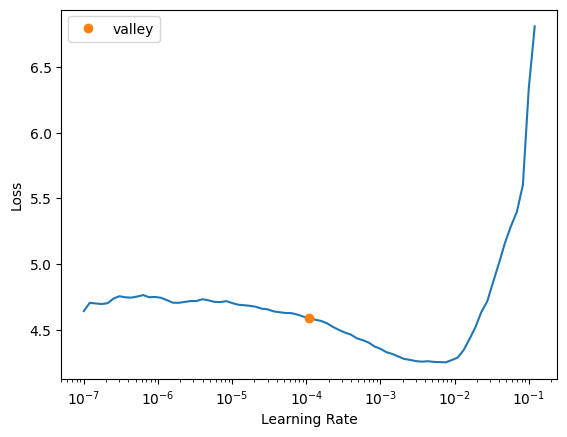

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.484293,3.202085,24.583735,00:27


In [ ]:
df_valid.head(1)

,caption
427,Robinhood and Little John gone fishing. | @nomad.mick | Featured pack from the Atmos/Aura AG Series | #OspreyPacks


In [ ]:
#prompt = "created a new post about the "Adventure" model backpack for 25 liters for $200"

The prompt needs to be tokenized and numericalized, so we use the same function as before to do this, before we use the `generate` method of the model.

In [ ]:
#prompt_ids = tokenizer.encode(prompt)
#inp = tensor(prompt_ids)[None].cuda()
#inp.shape

In [ ]:
#preds = learn.model.generate(inp, max_length=50, num_beams=20, temperature=0.7, do_sample = True)

In [ ]:
#tokenizer.decode(preds[0].cpu().numpy())

In [ ]:
import gradio as gr

def generate_in_ui(prompt):
    prompt_ids = tokenizer.encode(prompt)
    inp = tensor(prompt_ids)[None].cuda()
    inp.shape
    preds = learn.model.generate(inp, max_length=75, num_beams=5, temperature=1.5,eos_token_id=eos_token_id, do_sample = True)
#    return tokenizer.decode(preds[0].cpu().numpy())
    result = tokenizer.decode(preds[0].cpu().numpy(), skip_special_tokens=True)
    return result.replace(prompt, '')[3:]


demo = gr.Interface(
    fn=generate_in_ui,
    inputs=["text"],
    outputs=["text"],
)
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://43b28f2d3abc2ddcd4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install joblib
import joblib

In [ ]:
torch.save(model, "model.pth")

In [ ]:
from google.colab import drive

# Підключення до Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Копіювання моделі на Google Drive
shutil.copy("model.pth", "/content/drive/My Drive/model.pth")

'/content/drive/My Drive/model.pth'